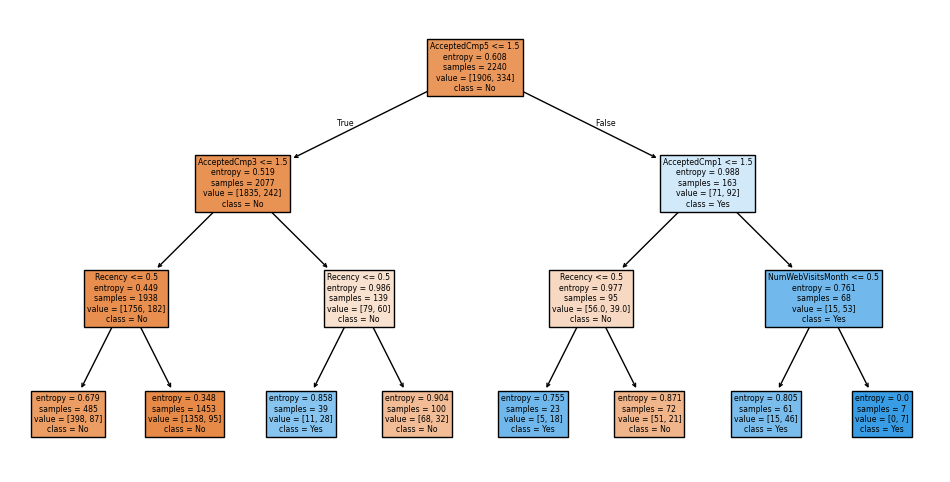

Best root node: AcceptedCmp5


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from scipy.stats import entropy

def calculate_entropy(y):
    """Calculate entropy for a dataset."""
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return entropy(probs, base=2)

def calculate_gini(y):
    """Calculate Gini index for a dataset."""
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return 1 - np.sum(probs ** 2)

def bin_data(series, num_bins=4, method='equal_width'):
    """Bin continuous data into categories."""
    if method == 'equal_width':
        return pd.cut(series, bins=num_bins, labels=False)
    elif method == 'equal_frequency':
        return pd.qcut(series, q=num_bins, labels=False, duplicates='drop')

def information_gain(X, y, feature):
    """Compute information gain for a given feature."""
    total_entropy = calculate_entropy(y)
    values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * calculate_entropy(y[X[feature] == values[i]]) for i in range(len(values)))
    return total_entropy - weighted_entropy

def find_best_root(X, y):
    """Find the best root node using Information Gain."""
    return max(X.columns, key=lambda col: information_gain(X, y, col))

# Load dataset
df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="marketing_campaign")
y = df['Response']
X = df.select_dtypes(include=['number']).drop(columns=['ID', 'Response'])

# Handle continuous variables by binning
for col in X.columns:
    X[col] = bin_data(X[col], num_bins=4)

# Build Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

# Identify best root node
best_root = find_best_root(X, y)
print("Best root node:", best_root)
